In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV#自動調參
from sklearn import metrics
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

In [53]:
df = pd.read_csv('D:\IMLP342\data\\cars.csv')
df.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


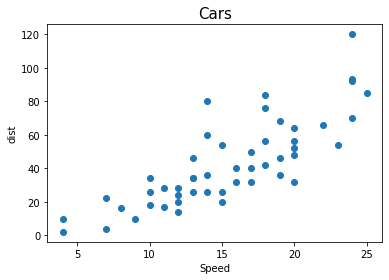

In [54]:
plt.title('Cars', fontsize=15)
plt.xlabel("Speed",fontsize=10)
plt.ylabel("dist",fontsize=10)
plt.scatter(df['speed'], df['dist'])

In [55]:
train, test = train_test_split(
    df, test_size = 0.3, random_state = 1)

In [56]:
len(train)

35

In [57]:
len(test)

15

In [58]:
pd.isnull(df).sum()

speed    0
dist     0
dtype: int64

In [59]:
scaler = StandardScaler()

speed_train = np.array(train['speed']).reshape(-1,1)
speed_test = np.array(test['speed']).reshape(-1,1)
dist_train = np.array(train['dist']).reshape(-1,1)
dist_test = np.array(test['dist']).reshape(-1,1)

train['speed'] = scaler.fit_transform(speed_train)
test['speed'] = scaler.transform(speed_test)
train['dist'] = scaler.fit_transform(dist_train)
test['dist'] = scaler.transform(dist_test)

train.head()

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

,speed,dist
42,1.024508,0.940233
49,1.983271,1.796578
26,0.257497,-0.364675
22,-0.126009,1.592686
13,-0.509514,-0.690902


In [60]:
trainX = np.array(train['speed']).reshape(-1,1)
testX = np.array(test['speed']).reshape(-1,1)
trainY = np.array(train['dist']).reshape(-1,1)
testY = np.array(test['dist']).reshape(-1,1)

In [61]:
# 建立 random forest 模型
forest = RandomForestRegressor(n_estimators = 100)
forest_fit = forest.fit(trainX, trainY)

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [62]:
trainY_predicted = forest.predict(trainX)
testY_predicted = forest.predict(testX)
testY_predicted

array([-0.27220528,  1.26564387,  0.82697743,  0.82697743, -1.09980927,
       -1.09980927,  1.58266845,  0.12858   ,  1.58266845,  1.38171268,
        1.38171268,  0.82697743,  0.66668916,  1.26564387,  0.66668916])

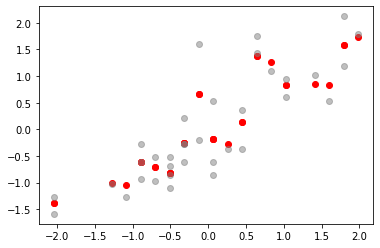

In [65]:
plt.scatter(trainX, trainY_predicted, c = 'red')
plt.scatter(trainX, trainY, c = 'gray', alpha = 0.5)

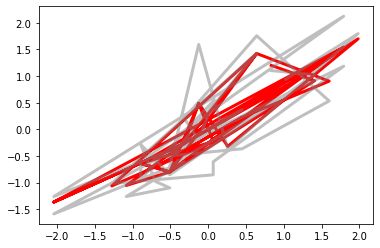

In [32]:
plt.plot(trainX, trainY_predicted, color = 'red', linewidth = 3)
plt.plot(trainX, trainY, color = 'gray', linewidth = 3, alpha = 0.5)

In [68]:
trainPredict = scaler.inverse_transform(trainY_predicted.reshape(-1,1))
trainY_val = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testY_predicted.reshape(-1,1))
testY_val = scaler.inverse_transform(testY)

In [77]:
MSE_train = metrics.mean_squared_error(trainY_val, trainPredict)
print("Training Set--MSE = ", MSE_train)

Training Set--MSE =  82.6448918932399


In [78]:
MSE_test = metrics.mean_squared_error(testY_val, testPredict)
print("Testing Set--MSE = ", MSE_test)

Testing Set--MSE =  499.0065885196817


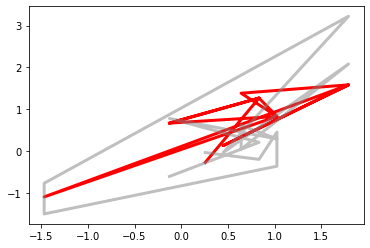

In [80]:
plt.plot(testX, testY_predicted, color = 'red', linewidth = 3)
plt.plot(testX, testY, color = 'gray', linewidth = 3, alpha = 0.5)